In [1]:
import json
import os
from typing import List

import fitz
from fitz.utils import get_pixmap
from IPython.display import HTML, Markdown, display
from PIL import Image

from uniparser_tools.api.clients import UniParserClient
from uniparser_tools.common.constant import FormatFlag, LayoutType, ParseMode, ParseModeTextual
from uniparser_tools.common.dataclass import BBox, Direction, GroupedResult, LayoutItem, SemanticItem
from uniparser_tools.utils.convert import dict2obj
from uniparser_tools.utils.log import get_root_logger
from uniparser_tools.utils.processor import tree_repr


###### 以下为示例代码，请自行修改

# ==============================================================================================
host = "https://uniparser.dp.tech/"  # 官网

# 替换为你的认证 api key
api_key = os.getenv('UNIPARSER_API_KEY')

# 初始化客户端
parser = UniParserClient(host=host, api_key=api_key)

token = "2ff6db102b6d527bb4deef6e5cec442a"
input_file = "./tasks/CN1275981A.pdf"
save_dir = "./outputs/molecule_extracrtion"
os.makedirs(save_dir, exist_ok=True)
os.makedirs(f"{save_dir}/{token}", exist_ok=True)

In [2]:
trigger_result = parser.trigger_file(
    file_path=input_file,
    token=token,
    textual=ParseModeTextual.DigitalExported,
    table=ParseMode.OCRFast,
    molecule=ParseMode.OCRFast,
    chart=ParseMode.DumpBase64,
    figure=ParseMode.DumpBase64,
    expression=ParseMode.DumpBase64,
    equation=ParseMode.OCRFast,
)
if trigger_result["status"] != "success":
    print(json.dumps(trigger_result, indent=4))
    raise Exception("trigger file failed")
print(f"trigger success, token: {trigger_result['token']}")

trigger success, token: 2ff6db102b6d527bb4deef6e5cec442a


In [3]:
result = parser.get_result(token, pages_tree=True)
if result["status"] != "success":
    print(json.dumps(result, indent=4))
    raise Exception("get result failed")
json.dump(result["pages_tree"], open(f"{save_dir}/{token}.json", "w"), indent=4)

In [4]:
pages_tree = dict2obj(result["pages_tree"]) 

In [5]:
pages_tree[2]

[GroupedResult(token='2ff6db102b6d527bb4deef6e5cec442a', page=2, block=3, bbox=BBox(x1=0.2971211665818671, y1=0.10839842843896136, x2=0.7110178715040704, y2=0.17773435687792272), conf=0.96435546875, page_size=[1190, 1684], type='image', hidden=False, order=0, lang='zh-hans', direction=<Direction.Unknown: -2>, source='', level=1, method='default', items=[GroupedResult(token='2ff6db102b6d527bb4deef6e5cec442a', page=2, block=2, bbox=BBox(x1=0.2971211665818671, y1=0.10839842843896136, x2=0.7110178715040704, y2=0.17773435687792272), conf=0.9677734375, page_size=[1190, 1684], type='moleculegroup', hidden=False, order=1, lang='zh-hans', direction=<Direction.Unknown: -2>, source='', level=1, method='default', items=[MoleculeResult(token='2ff6db102b6d527bb4deef6e5cec442a', page=2, block=10, bbox=BBox(x1=0.2971211665818671, y1=0.10839842843896136, x2=0.4470636960839023, y2=0.17773435687792272), conf=1.0, page_size=[1190, 1684], type='molecule', hidden=False, order=2, lang='zh-hans', direction=<D

In [6]:
print(tree_repr(GroupedResult.clone(pages_tree[2][0], type=LayoutType.Page, items=pages_tree[2])))

page
├─ image
│  └─ moleculegroup
│     ├─ molecule
│     └─ moleculeid
├─ paragraph
├─ image
│  └─ moleculegroup
│     ├─ molecule
│     └─ moleculeid
├─ paragraph
├─ image
│  └─ moleculegroup
│     ├─ molecule
│     └─ moleculeid
├─ paragraph
├─ paragraph
├─ paragraph
├─ paragraph
├─ watermark
├─ pagebar
└─ pagenumber



In [7]:
pages_tree[2][0].items[0]

GroupedResult(token='2ff6db102b6d527bb4deef6e5cec442a', page=2, block=2, bbox=BBox(x1=0.2971211665818671, y1=0.10839842843896136, x2=0.7110178715040704, y2=0.17773435687792272), conf=0.9677734375, page_size=[1190, 1684], type='moleculegroup', hidden=False, order=1, lang='zh-hans', direction=<Direction.Unknown: -2>, source='', level=1, method='default', items=[MoleculeResult(token='2ff6db102b6d527bb4deef6e5cec442a', page=2, block=10, bbox=BBox(x1=0.2971211665818671, y1=0.10839842843896136, x2=0.4470636960839023, y2=0.17773435687792272), conf=1.0, page_size=[1190, 1684], type='molecule', hidden=False, order=2, lang='zh-hans', direction=<Direction.Unknown: -2>, source='/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAEOAY0DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE

In [8]:
mol_group = pages_tree[2][0].items[0]

In [9]:
print(tree_repr(mol_group))

moleculegroup
├─ molecule
└─ moleculeid



In [10]:
mol_group.items[0]

MoleculeResult(token='2ff6db102b6d527bb4deef6e5cec442a', page=2, block=10, bbox=BBox(x1=0.2971211665818671, y1=0.10839842843896136, x2=0.4470636960839023, y2=0.17773435687792272), conf=1.0, page_size=[1190, 1684], type='molecule', hidden=False, order=2, lang='zh-hans', direction=<Direction.Unknown: -2>, source='/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAEOAY0DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1R

In [11]:
display(Markdown(mol_group.format_as(FormatFlag.Markdown)))

****C(C(O*)=O)N<sep><a>0:R[1]</a><a>4:SG[1]</a>***

(II)



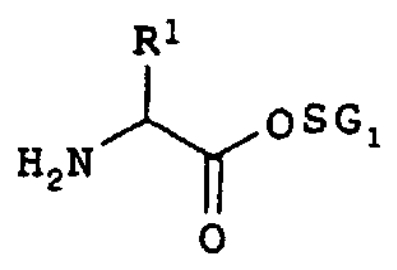

In [12]:
display(HTML(f'<img src="data:image/png;base64,{mol_group.items[0].source}" />'))

In [13]:
doc = fitz.Document(input_file)
# dpi = 300

# group 
# page = doc[group.page]
# max_dpi = min(dpi, max(1, int(4096 * 72 / max(page.rect.width, page.rect.height))))  # max 4096 pixels
# group_clip: BBox = group.bbox * [page.rect.width, page.rect.height] + tuple(page.rect.top_left)
# pix = get_pixmap(page, clip=fitz.Rect(*group_clip.xyxy), dpi=max_dpi)
# group_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
# if save_dir:
#     pix.save(save_dir / f"{group_name}.group.png")
# group_size = [pix.width, pix.height]


def crop_item(
    page: fitz.Page, item: LayoutItem, dpi: int = 144, max_size: int = None, rotated: bool = True
) -> Image.Image:
    bbox: BBox = item.bbox * [page.rect.width, page.rect.height] + tuple(page.rect.top_left)
    clip = fitz.Rect(*bbox.xyxy)
    if max_size is not None:
        max_dpi = min(dpi, max(1, int(max_size * 72 / max(clip.width, clip.height))))  # max pixels
    else:
        max_dpi = dpi
    pix = get_pixmap(page=page, alpha=False, dpi=max_dpi, clip=clip)
    cropped = Image.frombytes("RGB", (pix.width, pix.height), pix.samples)
    if min(cropped.size) == 0:
        get_root_logger().warning(
            f"{item.token} Crop config: {bbox=}, {clip=}, {page.rect=}, pix.shape={pix.width, pix.height}, {max_dpi=}"
        )
        
    if min(cropped.size) == 0:
        get_root_logger().warning(f"{item.token} Crop error: size={cropped.size} {item=}, {dpi=}, {max_size=}")
        cropped = Image.new("RGB", [10, 10], (255, 255, 255))
    if rotated and item.direction in [Direction.Rotate_90, Direction.Rotate_180, Direction.Rotate_270]:
        get_root_logger().debug(f"{item.token} Crop rotate: {item.direction=}")
        if item.direction == Direction.Rotate_90:
            cropped = cropped.transpose(Image.Transpose.ROTATE_90)
        elif item.direction == Direction.Rotate_180:
            cropped = cropped.transpose(Image.Transpose.ROTATE_180)
        elif item.direction == Direction.Rotate_270:
            cropped = cropped.transpose(Image.Transpose.ROTATE_270)
    return cropped


In [14]:
def recursive_find_groups(
    item: SemanticItem,
    required_types: List[LayoutType] = [
        LayoutType.MoleculeGroup,
    ],
) -> List[SemanticItem]:
    for t in required_types:
        assert 'group' in t.value, t
    if item.type in required_types:
        return [item]
    elif isinstance(item, GroupedResult):
        items = [itt for it in item.items for itt in recursive_find_groups(it, required_types)]
        return items
    else:
        return []

In [15]:
all_mol_groups: List[GroupedResult] = []
for page_idx, page in enumerate(pages_tree):
    # print(f"page {page_idx}")
    for item in page:
        # print(item)
        all_mol_groups.extend(recursive_find_groups(item, required_types=[LayoutType.MoleculeGroup]))
print(len(all_mol_groups))

33


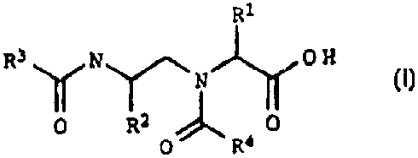

****C(=O)NC(*)CN(C(*)=O)C(*)C(=O)O<sep><a>0:R[3]</a><a>5:R[2]</a><a>9:R[4]</a><a>12:R[1]</a>***

(1)


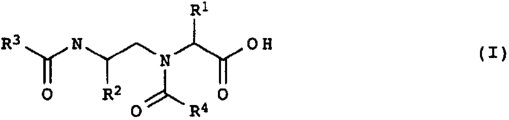

****C(=O)NC(*)CN(C(*)=O)C(*)C(=O)O<sep><a>0:R[3]</a><a>5:R[2]</a><a>9:R[4]</a><a>12:R[1]</a>***

(I)


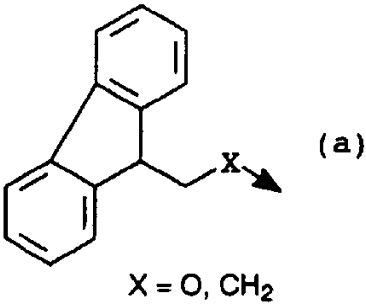

*****CC1c2ccccc2-c2ccccc21***

(a)

$$ X = O, CH_2 $$


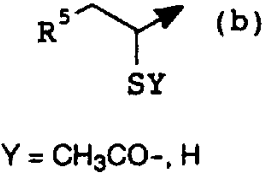

****CC(*)*<sep><a>0:R[5]</a><a>3:Y</a><a>4:SY</a>***

(b)

$ Y = CH_{3}CO- $ , H


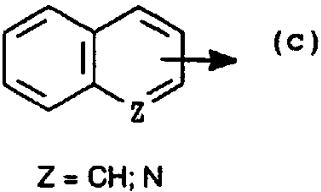

***C1C=*C2C=CC=CC=2C=1<sep><r>0:R</r><a>2:Z</a>***

(c)

$$ Z = CH; N $$


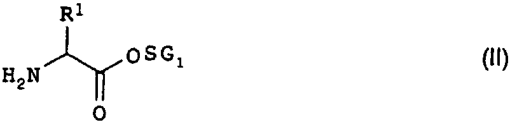

****C(C(O*)=O)N<sep><a>0:R[1]</a><a>4:SG[1]</a>***

(II)


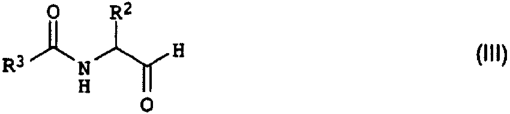

****C(=O)NC(*)C=O<sep><a>0:R[3]</a><a>5:R[2]</a>***

(Ⅲ)


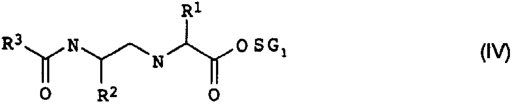

****C(NC(CNC(C(O*)=O)*)*)=O<sep><a>0:R[3]</a><a>9:SG[1]</a><a>11:R[1]</a><a>12:R[2]</a>***

(IV)


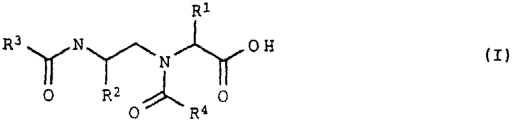

****C(=O)NC(*)CN(C(*)=O)C(*)C(=O)O<sep><a>0:R[3]</a><a>5:R[2]</a><a>9:R[4]</a><a>12:R[1]</a>***

(I)


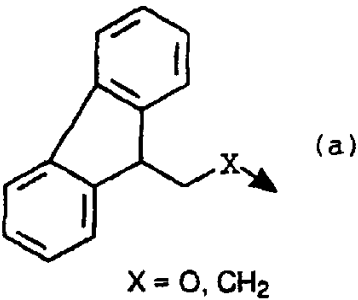

*****CC1c2ccccc2-c2ccccc21***

(a)

$$ X = O, CH_2 $$


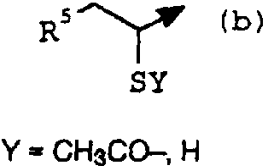

****CC(*)*<sep><a>0:R[5]</a><a>3:W</a><a>4:SY</a>***

(b)

$ Y = CH_{3}CO-H $


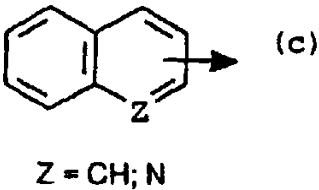

***C1C=*C2C=CC=CC=2C=1<sep><r>0:R</r><a>2:Z</a>***

(c)

Z = CH; N


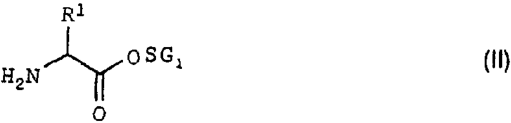

****C(C(O*)=O)N<sep><a>0:R[1]</a><a>4:SG[1]</a>***

(Ⅱ)


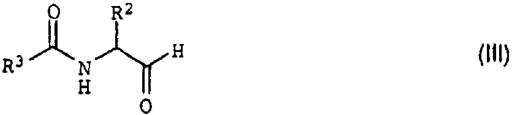

****C(NC(C([H])=O)*)=O<sep><a>0:R3</a><a>6:R2</a>***

(III)


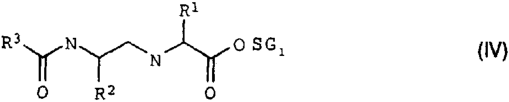

****C(NC(CNC(C(O*)=O)*)*)=O<sep><a>0:R[3]</a><a>9:SG[1]</a><a>11:R[1]</a><a>12:R[2]</a>***

(IV)


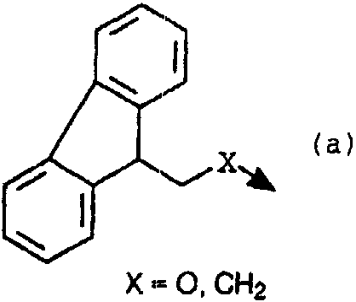

*****CC1c2ccccc2-c2ccccc21***

(a)

$$ X = O, CH_2 $$


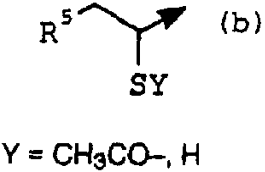

****CC(*)*<sep><a>0:R[5]</a><a>3:Y</a><a>4:SY</a>***

(b)

$$ Y = CH_3CO^- H $$


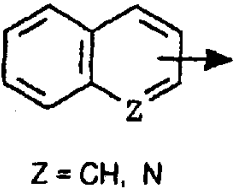

***C1C=*C2C=CC=CC=2C=1<sep><r>0:R</r><a>2:Z</a>***

$$ Z = CH, \quad N $$


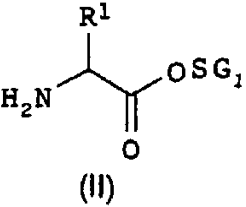

****C(C(O*)=O)N<sep><a>0:R[1]</a><a>4:SG[1]</a>***

(Ⅱ)


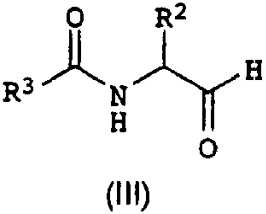

****C(=O)NC(*)C=O<sep><a>0:R[3]</a><a>5:R[2]</a>***

(III)


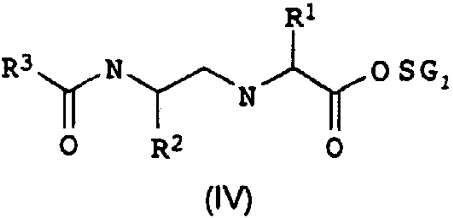

****C(NC(CNC(C(O*)=O)*)*)=O<sep><a>0:R[3]</a><a>9:SG[2]</a><a>11:R[1]</a><a>12:R[2]</a>***

(IV)


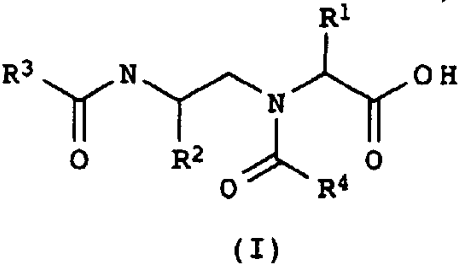

****C(=O)NC(*)CN(C(*)=O)C(*)C(=O)O<sep><a>0:R[3]</a><a>5:R[2]</a><a>9:R[4]</a><a>12:R[1]</a>***

(I)


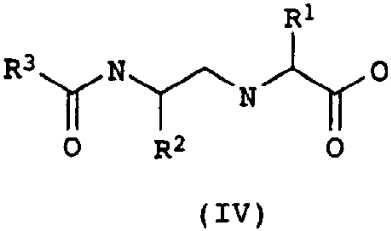

****C(NC(CNC(C(O)=O)*)*)=O<sep><a>0:R[3]</a><a>10:R[1]</a><a>11:R[2]</a>***

(IV)


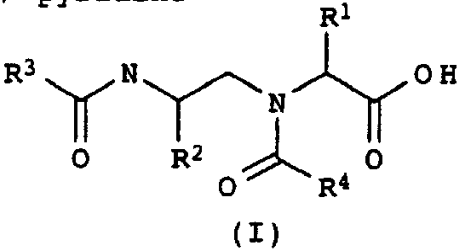

****C(=O)NC(*)CN(C(*)=O)C(*)C(=O)O<sep><a>0:R[3]</a><a>5:R[2]</a><a>9:R[4]</a><a>12:R[1]</a>***

(Ⅰ)


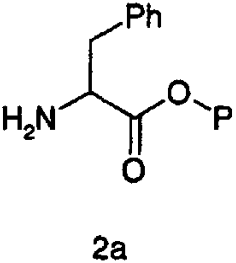

****CC(N)C(=O)O*<sep><a>0:Ph</a><a>7:P</a>***


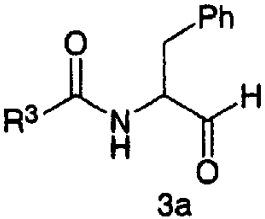

****C(NC(C([H])=O)C*)=O<sep><a>0:R3</a><a>7:Ph</a>***

3a


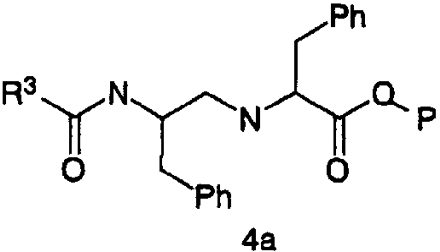

****CC(NC(=O)*)CNC(C(O*)=O)C*<sep><a>0:Ph</a><a>6:R3</a><a>12:P</a><a>15:Ph</a>***

4a


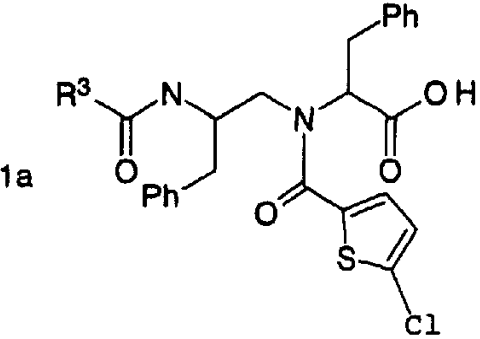

1a

****CC(CN(C(C1SC(Cl)=CC=1)=O)C(C(O)=O)C*)NC(=O)*<sep><a>0:Ph</a><a>18:Ph</a><a>22:R3</a>***


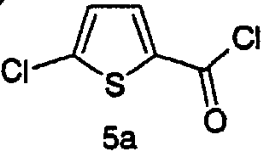

F0]

***O=C(Cl)c1ccc(Cl)s1***


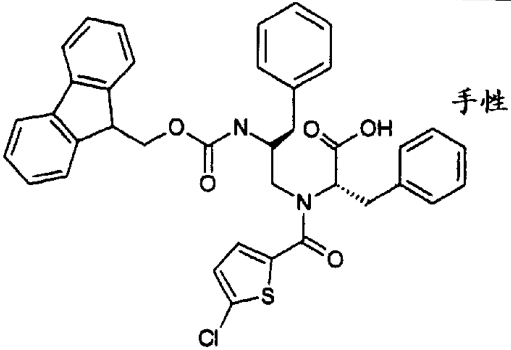

***O=C(N[C@H](Cc1ccccc1)CN(C(=O)c1ccc(Cl)s1)[C@H](Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21***

手性


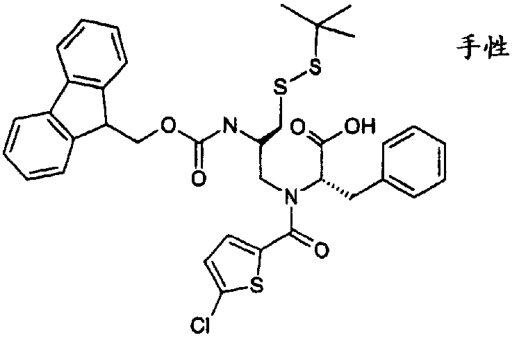

***CC(C)(C)SSC[C@H](CN(C(=O)c1ccc(Cl)s1)[C@@H](Cc1ccccc1)C(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21***


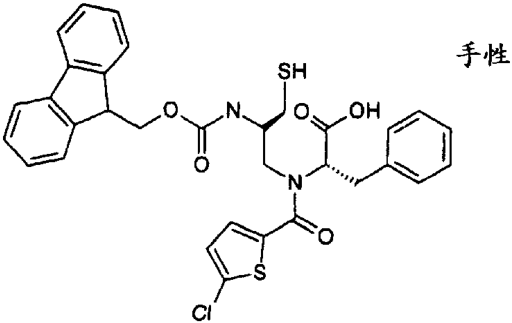

***O=C(N[C@@H](CS)CN(C(=O)c1ccc(Cl)s1)[C@@H](Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21***

手性


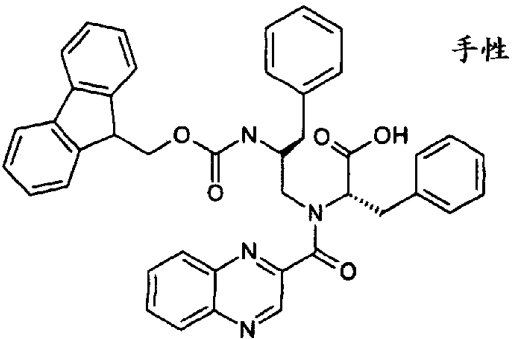

***O=C(N[C@H](Cc1ccccc1)CN(C(=O)c1cnc2ccccc2n1)[C@@H](Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21***

手性


In [16]:
for mol_group_ in all_mol_groups:
    # print(tree_repr(mol_group_))
    # display(HTML(f'<span>分子</span> <img src="data:image/png;base64,{mol_group_.items[0].source}" />'))
    mol_group_image = crop_item(doc[mol_group_.page], mol_group_, dpi=200, max_size=512)
    mol_group_image.save(f"{save_dir}/{token}/{mol_group_.page}_{mol_group_.order}.png")
    mol_group_desc = mol_group_.format_as(FormatFlag.Markdown)
    open(f"{save_dir}/{token}/{mol_group_.page}_{mol_group_.order}.txt", "w").write(mol_group_desc)
    display(mol_group_image)
    display(Markdown(mol_group_desc))
    print("==" * 50)